### 模块

模块时一个包含所有你定义的函数和变量的文件，其后缀名是 `.py`

模块可以被别的程序引入，以使用该模块中的功能。

#### `import` 语句

当解释器遇到import语句，如果模块在当前搜索路径就会被导入。

```python
import sys
```

导入sys模块后，我们就有一个变量 `sys` 指向该模块，利用`sys`这个变量，就可以访问`sys`模块的所有功能。


一个模块只会被导入一次，不管你执行了多少次`import`。这样可以防止导入模块被一遍又一遍地执行。

当我们使用import语句的时候，Python解释器是怎样找到对应的文件的呢？
这就设计到python的搜索路径，搜索路径是由一系列目录名组成的，Python解释器就依次从这些目录中取寻找所引入的模块。
这看起来很像环境变量，实际上你也可以通过定义环境变量的方式来修改搜索路径。


In [2]:
import sys
print(sys.path)

['/Users/yitao/python-crash-course', '/usr/local/Cellar/python@3.9/3.9.9/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/usr/local/Cellar/python@3.9/3.9.9/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/usr/local/Cellar/python@3.9/3.9.9/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/site-packages']


### 深入模块

#### `__name__` 属性

模块除了方法定义，还可以包扩可执行的代码。这些代码一般用来初始化这个模块。**这些代码只有在第一次被导入时才会被执行**。

一个模块被另一个程序第一次引入时，其主程序将运行。如果我们想在模块被引入时，模块中的某一段程序不执行，我们可以用 `__name__` 属性来进行判断，确保代码块只在该模块自身运行时执行。

> 每一个模块都有一个 `__name__` 属性，当它的值是 `__main__` 时表示该模块自身在运行，否则表示被引入。

In [3]:
if __name__ == '__main__':
    print("程序自身在运行")
else:
    print('被另一个程序引入而执行')

程序自身在运行


### 包Package

包是一种管理Python模块命名空间的形式。

比如一个模块的名称是 `A.B` 说明它是一个包 `A` 中的一个子模块 `B`。

> A directory must contain a file named `__init__.py` in order for Python to consider it as a package. This file can be left empty but we generally place the initialization code for that package in this file.

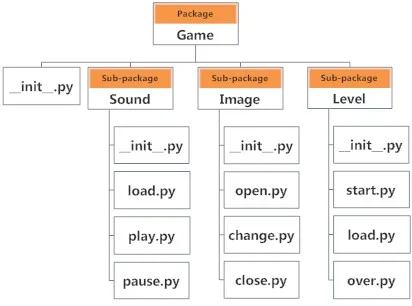

```python
# 如果想要导入Level包中的start.py模块
import Game.Level.start

Game.Level.start.select_difficulty(2)
```



#### Example

```
sound/                          顶层包
      __init__.py               初始化 sound 包
      formats/                  文件格式转换子包
              __init__.py
              wavread.py
              wavwrite.py
              aiffread.py
              aiffwrite.py
              auread.py
              auwrite.py
              ...
      effects/                  声音效果子包
              __init__.py
              echo.py
              surround.py
              reverse.py
              ...
      filters/                  filters 子包
              __init__.py
              equalizer.py
              vocoder.py
              karaoke.py
              ...
```

在导入一个包的时候，Python会根据`sys.path`中的目录来寻找这个包中包含的子目录。

目录只有包含一个 `__init__.py` 的文件才会被认作是一个包，主要是为了避免一些其他文件不小心影响到搜索路径中的有效模块。

最简单的情况，你只需要创建一个空文件 `__init__.py` 就可以了，其他情况下你也可以写一些初始化代码或者为 `__all__` 变量赋值。